<a href="https://colab.research.google.com/github/lisatwyw/epi-galla.github.io/blob/main/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# R convention 
- r: generic prefix for random variable generation, e.g. ```rnorm()```

- d: probability density function, e.g. ```dunif()``` and ```dnorm()``` 
- p: cumulative density function, e.g. ```punif()``` and ```pnorm()``` 
- q: quantile function, e.g. ```qunif()``` and ```qnorm()``` 

In [ ]:
if (0)
{
        curve()

        dchisq()

        df()

        dunif()

        length()

        mean()

        pchisq()

        pf()

        pnorm()

        pt()

        punif()

        qchisq()

        qf()

        qnorm()

        qt()

        qunif()

        rchisq()

        rt()

        runif()

        sd()

        seq()

        subset()

        sum()
}

# 1) Binomial distribution

- ```rbinom```: random Bionmial
- ```dbinorm```: probability density function (pdf) of the binomial distribution

In [ ]:
?rbinom

In [ ]:
# 10 tosses of fair coin
(fair<-rbinom( n=10, size=1, prob=.5))
sum(fair)

# 10 tosses of fair coin
(unfair<-rbinom(n=10, size=1, prob=.9))
sum(unfair)

# remember how to make results reproducible!?

[1] 1 1 1 0 0 1 0 1 0 1

[1] 6

[1] 1 1 1 1 1 1 1 1 1 1

[1] 10

In [ ]:
typeof(fair)


[1] "integer"

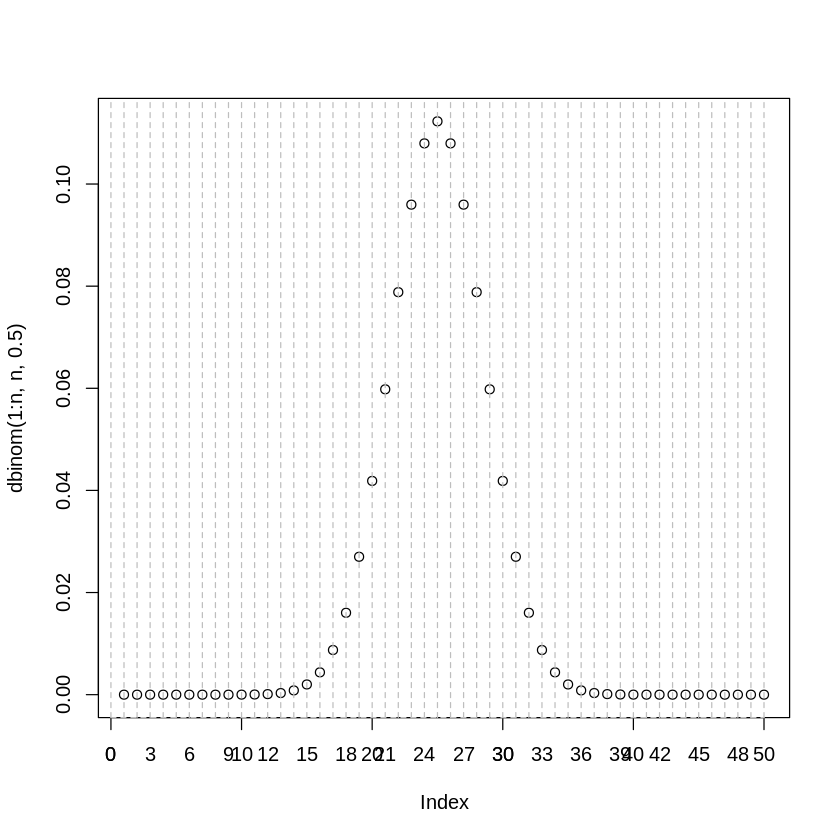

In [ ]:
n<- 50 # n trials
plot( dbinom(1:n,n,0.5) )

if (1) # 2 ways to add vertical grids  
{
  axis(1,
     at = seq(0, n, by = 1),
     tck = 1, lty = 2, col = "gray")
} else
{
  grid(ny = NA,
     nx = NULL,
     lty = 2, col = "gray", lwd = 2)
}     

In [ ]:
dbinom( x=20, size=n, prob=.5 )
dbinom( x=30, size=n, prob=.5 )
dbinom( x=n/2, size=n, prob=.5 )

[1] 0.04185915

[1] 0.04185915

[1] 0.1122752

In [ ]:
# One flips a fair coin 20 times. What is the probability that the coin lands on heads exactly 7 times?
dbinom( x=7, size=20, prob=.5 )


[1] 0.07392883

# 2) Cumulative density function 

In [ ]:
# Fair coin 20 times: what is the probability that the coin lands on heads more than 2 times?

pbinom(19, size=20, prob=.5, lower.tail=FALSE)  #FALSE because of "more than"

[1] 9.536743e-07

# 3) F-test & F distribution [added Nov 21]


- Any test in which the test statistic has F-distribution under the "null hypothesis", i.e. "two possibilities are the same"

- Coined by Ronald Fisher 

    



## Preliminaries
- data vector $x$ of size $N$ that can be categorized into $G$ groups of measurements
  - $G>1$ (comparing between two or more groups)
  - overall mean abbreviated as $\hat{\mu}$

## Common applications:

- H0: means of $G$ populations are equal (ANOVA), where populations are all normally distributed and having same standard deviation ($\sigma$) 
- H0: model fits the data well
- H0: dataset set in a regression analysis follows one of two proposed linear models (in particular, the simpler model is better) 

## Formula 


- Ratio of two variances:
  $\frac{ \text{ explained_var } }{ \text{unexplained_var} }$ or
  $\frac{ \text{ between } }{ \text{within} }$


- Explained or between-group variance:
  - $\text{between} := \sum_{i=1}^G  n_i ( \hat{x}_i - \hat{\mu} )^2  \frac{1}{ G - 1}$
    - $i$ is group index, each of size $n_i$, $\hat{\mu}$ is overall mean of the data



- Unexplained or within-group variance:      
  - $\text{within} :=  \sum_{i=1}^g \sum_{j=1}^{n_i} ( x_{ij} - \hat{x}_i )^2 \frac{1}{ N - g} $ 


- Conceptually, F-statistic is large if the between-group variability is large relative to within-group variability, which is unlikely if the population means of the groups are close to identical      



Two fitted models, with residual sum of squares $RSS_1$ and $RSS_2$, respectively: 

$F = \frac{(\frac{RSS_1 - RSS_2}{ p2 - p1})}{ (\frac{ RSS_2 }{ n-p2} ) }$

# 4) Exponential distribution [added Nov 24]


$f(x)= \frac{ \exp(−x/\mu) }{ \mu }$

- $x>0$
- $\mu>0$


In [ ]:
x<-1:10
t<-1
mu<-1
transformed <- exp( -x/ mu )/ mu 
plot( transformed  )
axis(1, at = seq(0, n, by = 1),tck = 1, lty = 2, col = "gray")
# grid(ny = NA, nx = NULL, lty = 2, col = "gray", lwd = 2)

# Viewing the definition of a built-in function [added Nov 25]

Simply, type the name of the function you're inquiring; e.g. ```sd```:

In [ ]:
sd


function (x, na.rm = FALSE) 
sqrt(var(if (is.vector(x) || is.factor(x)) x else as.double(x), 
    na.rm = na.rm))
<bytecode: 0x55f45a746190>
<environment: namespace:stats>

Preceeding with question mark gives us the documentation instead (which can be difficult to read)

In [ ]:
?sd

# Refresher on factorial (background to Poisson)


- Mathematically, $q! = q \times (q-1) \times (q -2) \dots \times 3 \times 2 \times 1$

  - e.g. $3! = 3 \times 2 \times 1$ 

- We can use the ```factorial()``` function:



In [ ]:
factorial( 3 )

[1] 6

In [ ]:
combn( 1:3, 3)

1
2
3
4
5


In [ ]:
prod( combn( 1:3, 3) )

[1] 6

# 5) Poisson distribution [added Nov 25]

Adopted from [Koehrsen's blog](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459):


- $\lambda$: rate parameter; e.g. 5 meteors per hour (1 every 12 minutes); $\lambda = 5$

- A discrete random variable $X$ is said to have Poisson distribution if it has a probability mass function given by:

  - $Pr( \text{X=q}| \lambda ) = \frac{e^{-\lambda} \lambda^q }{ q! }$ where:
    - $q$ is a count of events happening over a time period
    - $e$ is Euler's number, $e=2.71828\dots$

- Assumption: events are independent and identically distributed ("i.i.d."), e.g.:
  - meterors passing by
  - clinical events over a given period

- Somewhat intuitive explanation:
  - i.i.d. means we can multiply $\lambda$ for observing $q$ events; hence:
   $\lambda^q$
  - We overcounted because events are indistinguishable from each other; to adjust for overcountering, we divide by $q!$     

- $\exp( - \lambda )$  looks like this in the code block:

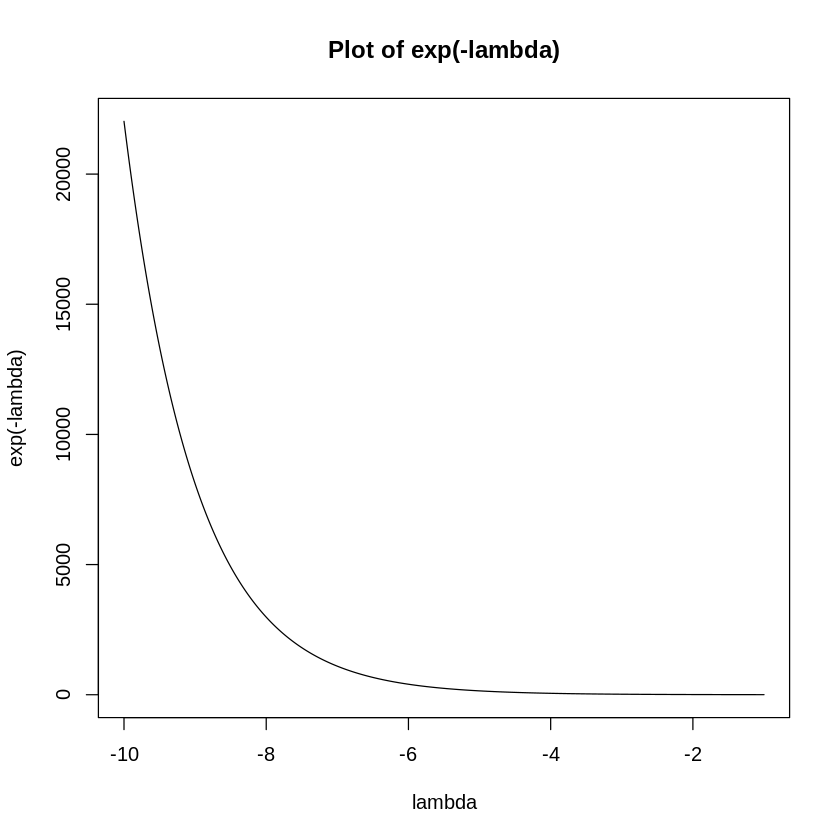

In [ ]:
lambda<- - seq(1, 10, .01)  # note the negative sign!
plot( lambda, exp( -lambda), type='l', main='Plot of exp(-lambda)' )

Intuitively:
- high value of lambda means we need a long waiting period to be able to observe an event  
- low lambda means waiting period will be short



- To calculate the probability of observing 3 meteors in one hour of observation: 

In [ ]:
lambda <- 5 # rate
q <- 3 # the count being inquired 

exp( -lambda ) * lambda^ q / factorial( q )

[1] 0.1403739

Let's practice function definitions; first setup the structure of a function:

In [ ]:
name_of_function <- function(  )
{


}